## Project: Stroke Prediction
### Purpose: Results

In [15]:
# standard libraries
import pandas as pd
import numpy as np
import pickle

from sklearn import metrics

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# customized functions
from functions import prepare_data_for_ML_models

In [3]:
# Load the validation sets' average performance scores for dataset 1 (with smoking status) 
#   and dataset 2 (only for patients who have never smoked)
#    contain average precision, recall, and F1 scores calculated for validation sets 
#    contain model objects
# They are located in results_in_dataframes folder. Please include file path if necessary
with open('df_resultmodels_smoke_data.pickle', 'rb') as read_to:
    df_result_data1 = pickle.load(read_to)  
        
with open('df_resultmodels_neversmoke_data.pickle', 'rb') as read_to:
    df_result_data2 = pickle.load(read_to)  
    

In [4]:
# Load training datasets 1 & 2; to be used to generate ROC and precision-recall curves
# Load training dataset1 (With smoking status)
# They are located in results_in_dataframes folder. Please include file path if necessary
with open('df_strat_train_smoke_clean.pickle', 'rb') as read_to:
    df_strat_train_smoke = pickle.load(read_to)  
# Load test Dataset 1
with open('df_strat_test_smoke_clean.pickle', 'rb') as read_to:
    df_strat_test_smoke = pickle.load(read_to)

# Load training dataset2 (Just patients who haven't smoked)
with open('df_strat_train_neversmoke_clean.pickle', 'rb') as read_to:
    df_strat_train_neversmoke = pickle.load(read_to)  
# Load test Dataset 1
with open('df_strat_test_neversmoke_clean.pickle', 'rb') as read_to:
    df_strat_test_neversmoke = pickle.load(read_to)        
  
# A list of categorical attributes or features in the 2 data sets
categorical_list_data1 = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
categorical_list_data2 = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type']

# A list of target variable in the 2 data sets
target_list = ['stroke']

# ===========================================================================
#    Apply one-hot encoding to categorical variables (For Regression)
#
# Dataset 1 - Set drop_one dummy TRUE (For Regression with an intercept)
df_X_train_smoke1, df_y_train_smoke1, df_X_test_smoke1, df_y_test_smoke1 = prepare_data_for_ML_models(df_strat_train_smoke, 
                df_strat_test_smoke, categorical_list_data1, target_list, drop_first_dummy=True)
# Dataset 2 - Set drop_one dummy TRUE (For Regression with an intercept)
df_X_train_n1, df_y_train_n1, df_X_test_n1, df_y_test_n1 = prepare_data_for_ML_models(df_strat_train_neversmoke, 
    df_strat_test_neversmoke, categorical_list_data2, target_list, drop_first_dummy=True)

y_test_smoke1 = df_y_test_smoke1['stroke'].values
y_test_n1 = df_y_test_n1['stroke'].values

# ===========================================================================
#    Apply one-hot encoding to categorical variables (For SVC, RF, and GBC)
#    
# Dataset 1 - Set drop_one dummy FALSE
df_X_train_smoke2, df_y_train_smoke2, df_X_test_smoke2, df_y_test_smoke2 = prepare_data_for_ML_models(df_strat_train_smoke, 
                df_strat_test_smoke, categorical_list_data1, target_list)
# Dataser 2 - Set drop_one dummy FALSE
df_X_train_n2, df_y_train_n2, df_X_test_n2, df_y_test_n2 = prepare_data_for_ML_models(df_strat_train_neversmoke, 
    df_strat_test_neversmoke, categorical_list_data2, target_list)

y_test_smoke2 = df_y_test_smoke2['stroke'].values
y_test_n2 = df_y_test_n2['stroke'].values    

In [5]:
# Load the test datasets' average performance scores for dataset 1 (with smoking status) 
#   and dataset 2 (only for patients who have never smoked)
#   contain precision, recall, F1, and confusion matrix calculated fro test datasets
# They are located in results_in_dataframes folder. Please include file path if necessary

with open('df_testresult_smoke_data.pickle', 'rb') as read_to:
    df_test_data1 = pickle.load(read_to)  
    
with open('df_testresult_neversmoke_data.pickle', 'rb') as read_to:
    df_test_data2 = pickle.load(read_to)  
    

In [5]:
# Load a list of dataframes that store feature importance for Random Forest Classifier
#      and Gradient Boosting Classifier; and coefficient values for Logistic Regression
# They are located in results_in_dataframes folder. Please include file path if necessary
with open('list_df_feature_importances.pickle', 'rb') as read_to:
    list_df_feature_values = pickle.load(read_to)  

### Look at the test results
#### Precision, Recall, F1, and Confusion Matrix

•	By implementing methods to handle the class imbalance problem, the precision score increases by 4% and the recall scores increases between 50% and 60% when comparing to the base models (i.e., the classifiers without implementation of any resampling strategy or weight penalty adjustment method).

•	The confusion matrices of Logistic Regression+weight adjustment, Random Forest Classifier+weight adjustment, Support Vector Classifier+ROS, and Gradient Boosting Classifier+ROS have the most True Positives and the least False Negatives for test dataset 1 (i.e., full dataset with smoking status). For test dataset 2 (i.e. dataset with patients who have never smoked), the stroke results predicted by Logistic Regression+ROS, Support Vector Classifier+ROS,, Gradient Boosting Classifier+ROS, and Forest Classifier+weight adjustment were the best. These conclusions are supported by the high recall scores of at least 0.8, which was calculated for these test datasets.

In [6]:
# Test results for dataset 1 (the full data with smoking status)
#   Note: Gradient Boosting doesn't have the weight strategy implemented
#        The conf_matrix column contains the confusion matrix of each classifier and 
#        its strategy of handling class imbalanced. "Base" doesn't impelemnet any stategy. 
#        The confusion matrix is represented by [[TN,FP],[FN, TP]]
df_test_data1


,strategy,model,macro_precision,macro_recall,macro_F1,conf_matrix
0,base,Logistic Regression,0.490975,0.500000,0.495447,"[[8759, 0], [161, 0]]"
1,base,LinearSVC_nystroem,0.490975,0.500000,0.495447,"[[8759, 0], [161, 0]]"
2,base,Random Forest,0.490962,0.499258,0.495075,"[[8746, 13], [161, 0]]"
3,base,Gradient Boosting,0.633938,0.505926,0.507265,"[[8754, 5], [159, 2]]"
4,weight,Logistic Regression,0.525858,0.800966,0.469583,"[[6306, 2453], [19, 142]]"
5,weight,LinearSVC_nystroem,0.525847,0.797438,0.471529,"[[6353, 2406], [21, 140]]"
6,weight,Random Forest,0.526078,0.805579,0.468719,"[[6278, 2481], [17, 144]]"
7,weight,Gradient Boosting,0.505664,0.573987,0.411672,"[[5594, 3165], [79, 82]]"
8,SMOTE,Logistic Regression,0.526106,0.795223,0.474799,"[[6423, 2336], [23, 138]]"
9,SMOTE,LinearSVC_nystroem,0.526424,0.794971,0.477311,"[[6473, 2286], [24, 137]]"


In [7]:
#  Test results for dataset 2 (data with patients who have never smoked)
#   Note: Gradient Boosting doesn't have the weight strategy implemented
#        The conf_matrix column contains the confusion matrix of each classifier and 
#        its strategy of handling class imbalanced. "Base" doesn't impelemnet any stategy. 
#        The confusion matrix is represented by [[TN,FP],[FN, TP]]
df_test_data2


,strategy,model,macro_precision,macro_recall,macro_F1,conf_matrix
0,base,Logistic Regression,0.491379,0.500000,0.495652,"[[3990, 0], [70, 0]]"
1,base,LinearSVC_nystroem,0.491379,0.500000,0.495652,"[[3990, 0], [70, 0]]"
2,base,Random Forest,0.491371,0.499499,0.495401,"[[3986, 4], [70, 0]]"
3,base,Gradient Boosting,0.491373,0.499624,0.495464,"[[3987, 3], [70, 0]]"
4,weight,Logistic Regression,0.525578,0.802381,0.473573,"[[2926, 1064], [9, 61]]"
5,weight,LinearSVC_nystroem,0.525480,0.801880,0.473069,"[[2922, 1068], [9, 61]]"
6,weight,Random Forest,0.526854,0.799875,0.483823,"[[3020, 970], [11, 59]]"
7,weight,Gradient Boosting,0.537965,0.564787,0.546935,"[[3880, 110], [59, 11]]"
8,SMOTE,Logistic Regression,0.526446,0.802381,0.479951,"[[2983, 1007], [10, 60]]"
9,SMOTE,LinearSVC_nystroem,0.527185,0.792356,0.489015,"[[3074, 916], [13, 57]]"


#### Visualize some of the best classifiers' confusion matrices
All the confusion matrix result are printed in the dataframes above. 

In [25]:
def plot_confusion_matrix_binary_classifier(cm, classes, title=None, cmap=plt.cm.Greens):
    plt.imshow(cm, cmap)
    plt.xticks([0,1],classes, rotation=45)
    plt.yticks([0,1],classes)
    plt.xlabel('Predicted label', size=16)
    plt.ylabel('True label', size=16) 
    plt.title(title)
    
    # Add annotation
    somenumber = cm.max()*0.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j,i, str(cm[i][j]), ha='center', va='center',size=12,
                    color='yellow' if cm[i][j]>somenumber else 'black')
    plt.show()

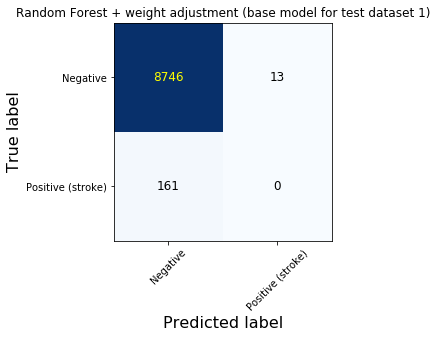

In [29]:
# 1a Confusion matric - Random Forest + without any strategy (base model) for test dataset 1
cm = df_test_data1[(df_test_data1['strategy']=='base') & (df_test_data1['model']=='Random Forest')]['conf_matrix'].values[0]
classes = ['Negative','Positive (stroke)']
title='Random Forest + weight adjustment (base model for test dataset 1)'
plot_confusion_matrix_binary_classifier(cm, classes, title, cmap=plt.cm.Blues)

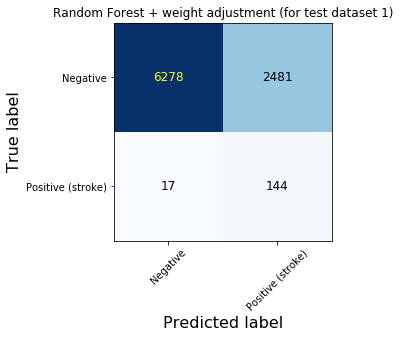

In [27]:
# 2b Confusion matric - Random Forest + weight adjustment for test dataset 1
cm = df_test_data1[(df_test_data1['strategy']=='weight') & (df_test_data1['model']=='Random Forest')]['conf_matrix'].values[0]
classes = ['Negative','Positive (stroke)']
title='Random Forest + weight adjustment (for test dataset 1)'
plot_confusion_matrix_binary_classifier(cm, classes, title, cmap=plt.cm.Blues)

The Random Forest Classifer's base model fails to predict any stroke case for dataset 1. After implemented the weight adjustment method (weight), Random Forest Classifer predicted 144 out of 161 stroke cases.

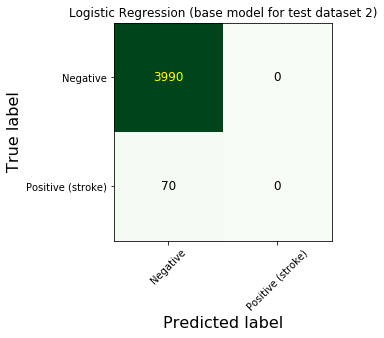

In [28]:
# 2a Confusion matric - Logistic Regression + without any strategy (base model) for test dataset 2
cm = df_test_data2[(df_test_data2['strategy']=='base') & (df_test_data2['model']=='Logistic Regression')]['conf_matrix'].values[0]
classes = ['Negative','Positive (stroke)']
title='Logistic Regression (base model for test dataset 2)'
plot_confusion_matrix_binary_classifier(cm, classes, title)

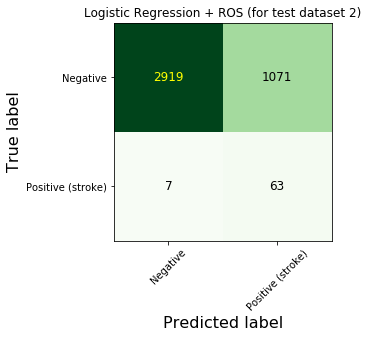

In [24]:
# 2b Confusion matric - Logistic Regression + ROS for test dataset 2
cm = df_test_data2[(df_test_data2['strategy']=='ROS') & (df_test_data2['model']=='Logistic Regression')]['conf_matrix'].values[0]
classes = ['Negative','Positive (stroke)']
title='Logistic Regression + ROS (for test dataset 2)'
plot_confusion_matrix_binary_classifier(cm, classes, title)

The Logistic Regression's base model fails to predict any stroke case for dataset 2. After implemented a synthesis of minority class strategy, Random Over Sampler (ROS), the Logistic Regression predicted 63 out of 70 stroke cases.

### ROC and precision-recall curves for the best models (test datasets)

In [20]:
def plot_bestmodel_metric_curves(df_model, df_X_test_LR, y_test_LR,  df_X_train_LR, df_y_train_LR, df_X_test, y_test_m, df_X_train, df_y_train, metric_curve='roc', title=''):
    '''
    Plot the ROC and Precision-Recall curves for a mixture of classifiers

    Input arguments    
    df_model: Classifier objects store in a dataframe
    df_X_train_LR, df_y_train_LR: Training datasets for Logistic Regression, features and target respectively
    df_X_test_LR, y_test_LR: Test datasets for Logistic Regression, features and target respectively    
    df_X_train, df_y_train: Training datasets for other models, features and target respectively
    df_X_test, y_test_m: Test datasetsfor other models, features and target respectively
    metric_curve: Specify which curves to plot, 'roc' or 'pc'
    title: Specify plot title name
    plot_name: Specify a unique name for image version (.png) of the plots
    '''
    # define the colormap
    cmap = plt.cm.tab10
    
    i = 0
    # Plot the precision-recall curves 
    for index in df_model.index.values:
        row = df_model.loc[[index]]
        model = row['pipemodel_object'].values[0]
        
        if row['model'].values[0] == 'Logistic Regression':
            model.fit(df_X_train_LR, df_y_train_LR)
            ypred_prob = model.predict_proba(df_X_test_LR)[:,1]  
            label_text = 'LR+'+ row['strategy'].values[0]
            y_test = y_test_LR

        elif row['model'].values[0] == 'LinearSVC_nystroem':
            model.fit(df_X_train, df_y_train)
            ypred_prob = model.decision_function(df_X_test) 
            label_text = 'LSVC+' + row['strategy'].values[0]
            y_test = y_test_m
 
        elif row['model'].values[0] == 'Random Forest':
            model.fit(df_X_train, df_y_train)
            ypred_prob = model.predict_proba(df_X_test)[:,1]  
            label_text = 'RFC+' + row['strategy'].values[0]
            y_test = y_test_m            

        elif row['model'].values[0] == 'Gradient Boosting':
            model.fit(df_X_train, df_y_train)
            ypred_prob = model.decision_function(df_X_test)
            label_text = 'GBC+' + row['strategy'].values[0]
            y_test = y_test_m                 

        if metric_curve == 'pc':        
            # Plot the precision-recall curves
            pc, rc, threshold = metrics.precision_recall_curve(y_test, ypred_prob)    
            aps = metrics.average_precision_score(y_test, ypred_prob)
            label_text += ' (aps = ' + str(round(aps,2)) + ')'
            plt.plot(rc, pc, color=cmap(i),linewidth=2,label=label_text)            
        else:   #roc
            # Plot the ROC curves and calculate AUC
            fpr, tpr, threshold = metrics.roc_curve(y_test, ypred_prob)
            auc = metrics.roc_auc_score(y_test, ypred_prob)
            label_text += ' (auc = ' + str(round(auc,2)) + ')'
            plt.plot(fpr, tpr, color=cmap(i),linewidth=2,label=label_text)         
            
        i += 1
        
    # Make plot
    plt.xlim([0, 1])
    plt.ylim([0, 1]) 
    if metric_curve == 'pc':             
        plt.xlabel('Recall', fontsize=16)
        plt.ylabel('Precision', fontsize=16)
        plt.title(title)
        plt.legend(loc="upper right")
        plt.show()
    else:   #roc
        plt.plot([0, 1], [0, 1],color='orange',linestyle='dashed')
        plt.xlabel('False Positive Rate', fontsize=16)
        plt.ylabel('True Positive Rate', fontsize=16)
        plt.title(title)
        plt.legend(loc="lower right")    
        plt.show()   

In [21]:
col_names = ['strategy', 'model', 'macro_precision', 'macro_recall', 'macro_F1', 'pipemodel_object', 'rscvmodel_object']

# Create a dataframe that contains all the best models for dataset1 
df1 = df_result_data1[(df_result_data1['model']=='Logistic Regression') & (df_result_data1['strategy']=='weight')]
df2 = df_result_data1[(df_result_data1['model']=='LinearSVC_nystroem') & (df_result_data1['strategy']=='ROS')]
df3 = df_result_data1[(df_result_data1['model']=='Random Forest') & (df_result_data1['strategy']=='weight')]
df4 = df_result_data1[(df_result_data1['model']=='Gradient Boosting') & (df_result_data1['strategy']=='ROS')]
df_bestmodel_data1 = pd.DataFrame(columns=col_names)
df_bestmodel_data1 = pd.concat([df1, df2, df3, df4])

# Create a dataframe that contains all the best models for dataset2 
df1 = df_result_data2[(df_result_data1['model']=='Logistic Regression') & (df_result_data2['strategy']=='ROS')]
df2 = df_result_data2[(df_result_data1['model']=='LinearSVC_nystroem') & (df_result_data2['strategy']=='ROS')]
df3 = df_result_data2[(df_result_data1['model']=='Random Forest') & (df_result_data2['strategy']=='weight')]
df4 = df_result_data2[(df_result_data1['model']=='Gradient Boosting') & (df_result_data2['strategy']=='ROS')]
df_bestmodel_data2 = pd.DataFrame(columns=col_names)
df_bestmodel_data2 = pd.concat([df1, df2, df3, df4])


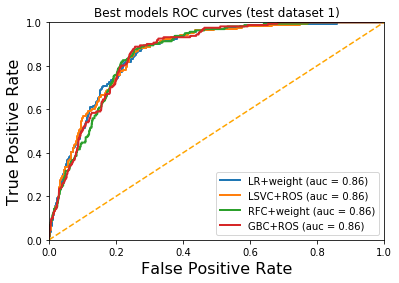

In [22]:
# The ROC curves for the best models from Test dataset 1 (the full data with smoking status)
#
plot_bestmodel_metric_curves(df_bestmodel_data1, df_X_test_smoke1, y_test_smoke1,\
                             df_X_train_smoke1, df_y_train_smoke1, df_X_test_smoke2,\
                             y_test_smoke2, df_X_train_smoke2, df_y_train_smoke2,\
                             metric_curve='roc',\
                             title='Best models ROC curves (test dataset 1)')

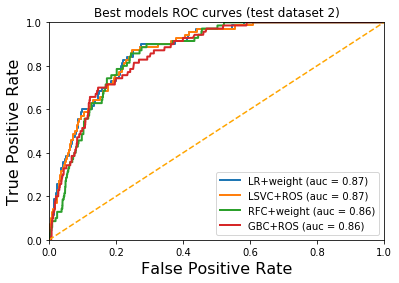

In [23]:
# The ROC curves for the best models from Test dataset 2 (Only patients who have never smoked)
plot_bestmodel_metric_curves(df_bestmodel_data1, df_X_test_n1, y_test_n1,\
                             df_X_train_n1, df_y_train_n1, df_X_test_n2,\
                             y_test_n2, df_X_train_n2, df_y_train_n2,\
                             metric_curve='roc',\
                             title='Best models ROC curves (test dataset 2)')

The ROC curves for the best classifiers have AUC values above 0.85. They are insensitive to the class distribution.

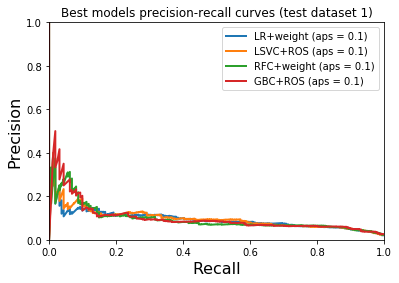

In [24]:
# The precision-recall curves for the best models from Test dataset 1 
#      (the full data with smoking status)
#
plot_bestmodel_metric_curves(df_bestmodel_data1, df_X_test_smoke1, y_test_smoke1,\
                             df_X_train_smoke1, df_y_train_smoke1, df_X_test_smoke2,\
                             y_test_smoke2, df_X_train_smoke2, df_y_train_smoke2,\
                             metric_curve='pc',\
                             title='Best models precision-recall curves (test dataset 1)')

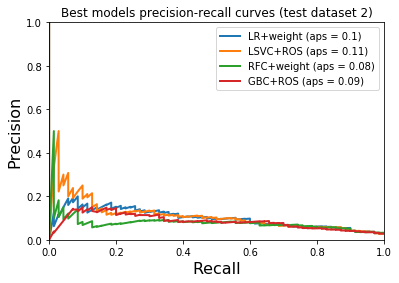

In [25]:
# The precision-recall curves for the best models from Test dataset 2 
#      (Only patients who have never smoked)
plot_bestmodel_metric_curves(df_bestmodel_data1, df_X_test_n1, y_test_n1,\
                             df_X_train_n1, df_y_train_n1, df_X_test_n2,\
                             y_test_n2, df_X_train_n2, df_y_train_n2,\
                             metric_curve='pc',\
                             title='Best models precision-recall curves (test dataset 2)')

The best models’ precision-recall curves above indicated that the improvement of the sensitivity (recall) of the classifiers would reach to a point where it won’t contribute in improving the precision score, which remains a low constant value

### Feature Importance 

In [8]:
# Print Logistic Regression's coefficients/feature values for test dataset1 
#    (with smoking status)
list_df_feature_values[0]

,base,weight,SMOTE,ADASYN,ROS
age,1.604705,1.572235,1.748143,1.634413,1.313045
avg_glucose_level,0.098857,0.129519,0.129023,0.128200,0.162577
bmi,-0.059350,-0.001136,-0.027043,-0.034865,-0.021968
gender_Male,-0.000147,-0.007422,0.044907,0.018579,-0.011808
gender_Other,-0.038287,-0.030957,-0.055179,-0.035456,-0.019144
hypertension_1,0.086490,0.106431,0.164805,0.167065,0.155576
heart_disease_1,0.118841,0.143829,0.249457,0.274368,0.230022
ever_married_Yes,-0.046691,-0.011866,-0.030015,0.007181,0.040059
work_type_Never_worked,-0.091846,-0.071762,-0.167483,-0.100228,-0.047166
work_type_Private,0.090597,0.073311,0.057856,0.055685,0.072747


In [9]:
# Print Logistic Regression's coefficients/feature values for test dataset2 
#     (patients who have never smoked)
list_df_feature_values[1]

,base,weight,SMOTE,ADASYN,ROS
age,1.579686,1.434970,1.170722,1.152966,1.151855
avg_glucose_level,0.051087,0.081294,0.116776,0.095016,0.115225
bmi,0.001224,0.114287,-0.021631,0.003209,0.067594
gender_Other,0.000000,0.000000,0.000000,0.000000,0.000000
gender_Male,-0.042807,-0.052573,-0.033991,-0.029099,-0.049179
hypertension_1,0.097808,0.120488,0.215803,0.216971,0.171028
heart_disease_1,0.065206,0.098751,0.217322,0.229792,0.168952
ever_married_Yes,-0.161354,-0.073969,0.035634,0.026383,0.018788
work_type_Never_worked,-0.028444,-0.033433,-0.033553,-0.035540,-0.036061
work_type_Private,0.055342,0.002134,-0.012467,-0.031395,-0.010897


In [10]:
# Print Random Forest Classifier's feature importance values for test dataset1 
#    (with smoking status)
list_df_feature_values[2]

,base,weight,SMOTE,ADASYN,ROS
age,2.201253e-01,4.140559e-01,0.823938,0.693335,0.894666
avg_glucose_level,3.372769e-01,6.330743e-02,0.000000,0.002863,0.056713
bmi,2.764469e-01,7.078389e-02,0.000921,0.003435,0.014583
gender_Female,8.886397e-03,5.037851e-03,0.000000,0.000000,0.000000
gender_Male,1.117081e-02,3.506435e-03,0.000000,0.000000,0.000000
gender_Other,6.163546e-07,8.118977e-07,0.000000,0.000000,0.000000
hypertension_0,6.228852e-03,3.042600e-02,0.000000,0.000847,0.000000
hypertension_1,7.622071e-03,2.780994e-02,0.000000,0.001592,0.000000
heart_disease_0,7.267568e-03,5.071538e-02,0.000400,0.133043,0.008524
heart_disease_1,7.157038e-03,3.793401e-02,0.000315,0.097407,0.012060


In [11]:
# Print Random Forest Classifier's feature importance values for test dataset2
#     (patients who have never smoked)
list_df_feature_values[3]

,base,weight,SMOTE,ADASYN,ROS
age,0.234457,0.283898,0.956422,0.979285,0.433129
avg_glucose_level,0.357340,0.128460,0.000000,0.000000,0.069158
bmi,0.288450,0.009660,0.000000,0.000000,0.024554
gender_Female,0.012232,0.000253,0.000928,0.000914,0.000631
gender_Other,0.000000,0.000000,0.000000,0.000000,0.000000
gender_Male,0.013265,0.004902,0.000880,0.000000,0.001573
hypertension_0,0.005476,0.114051,0.000000,0.000914,0.115173
hypertension_1,0.008968,0.054336,0.000000,0.003393,0.104619
heart_disease_0,0.006359,0.097375,0.000000,0.000000,0.035240
heart_disease_1,0.007148,0.066738,0.000000,0.000000,0.078376


In [12]:
# Print Gradient Boosting Classifier's feature importance values for test dataset1 
#    (with smoking status)
list_df_feature_values[4]

,base,weight,SMOTE,ADASYN,ROS
age,0.443765,0.100709,0.701067,0.680453,0.871320
avg_glucose_level,0.324217,0.034069,0.000000,0.000000,0.038858
bmi,0.122565,0.012479,0.000407,0.000632,0.047142
gender_Female,0.003020,0.005615,0.000797,0.010312,0.000000
gender_Male,0.000458,0.006907,0.010058,0.016061,0.000000
gender_Other,0.000000,0.000062,0.000000,0.000000,0.000000
hypertension_0,0.008291,0.012803,0.023689,0.024747,0.000000
hypertension_1,0.004549,0.018075,0.041326,0.031274,0.002819
heart_disease_0,0.018711,0.014855,0.023080,0.041019,0.006140
heart_disease_1,0.021564,0.018878,0.043350,0.031540,0.009117


In [13]:
# Print Gradient Boosting Classifier's feature importance values for test dataset2
#     (patients who have never smoked)
list_df_feature_values[5]

,base,weight,SMOTE,ADASYN,ROS
age,0.390709,0.288489,0.716589,0.234128,0.640345
avg_glucose_level,0.352213,0.343288,0.000449,0.006958,0.087038
bmi,0.172712,0.294803,0.000000,0.000000,0.041430
gender_Female,0.006450,0.001520,0.014559,0.011418,0.003068
gender_Other,0.000000,0.000000,0.000000,0.000000,0.000000
gender_Male,0.001915,0.001856,0.017648,0.062116,0.001009
hypertension_0,0.005813,0.001491,0.083693,0.135667,0.045992
hypertension_1,0.004221,0.004645,0.075664,0.237248,0.034268
heart_disease_0,0.006017,0.001310,0.000000,0.033796,0.020682
heart_disease_1,0.008976,0.001858,0.000000,0.006308,0.017532


#### Plot feature improtance for the Random Forest and Gradient Boosting classifiers

Text(0.5, 1.0, 'Featues Importance generated by Random Forest and Gradient Boosting for dataset 1')

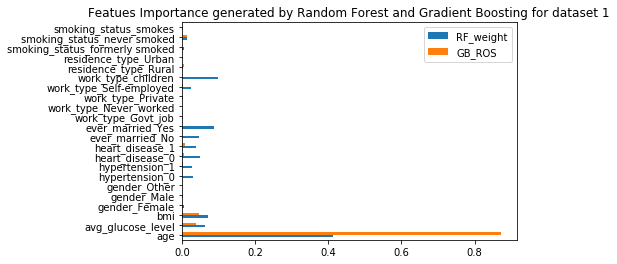

In [32]:
# For test dataset1 (full dataset with smoking status)
df_fi_smokes = pd.DataFrame(index=list_df_feature_values[2].index)
df_fi_smokes['RF_weight'] = list_df_feature_values[2]['weight']
df_fi_smokes['GB_ROS'] = list_df_feature_values[4]['ROS']
df_fi_smokes.plot.barh()
plt.title('Featues Importance generated by Random Forest and Gradient Boosting for dataset 1')

Age is the primary feature.

Both classifiers indicate that bmi and avg_glucose_level are the secondary important features.

Random Forest classifier also indicates that patients’ marital status, specific worktypes, heart disease, or hypertension are the main factors for stroke prediction. 

Text(0.5, 1.0, 'Featues Importance generated by Random Forest and Gradient Boosting for dataset 2')

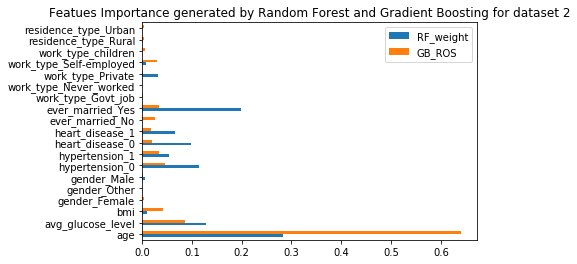

In [33]:
# For test dataset2 (datset with only patients who have never smoked)
df_fi_nosmokes = pd.DataFrame(index=list_df_feature_values[3].index)
df_fi_nosmokes['RF_weight'] = list_df_feature_values[3]['weight']
df_fi_nosmokes['GB_ROS'] = list_df_feature_values[5]['ROS']
df_fi_nosmokes.plot.barh()
plt.title('Featues Importance generated by Random Forest and Gradient Boosting for dataset 2')

Age is the primary feature.

Both classifiers indicate that patient's marital status, avg_glucose_level, heart disease, hypertension are the secondary features that indicate whether a patient who has never smoked would have a high stroke of risk. 